## Kmeans Clustering

In this project I've used Kmeans Clustering algorithm on Iris dataset and tried to find optimal value of K with Elbow method.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_iris
iris= load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df= pd.DataFrame(iris.data, columns= iris.feature_names)
df= df.drop(['sepal length (cm)','sepal width (cm)'], axis=1)

In [4]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


#### Cleaned column names.

In [5]:
df.rename(columns={'petal length (cm)':'petal_length','petal width (cm)':'petal_width'}, inplace= True)
df.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


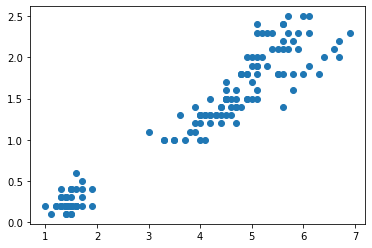

In [6]:
plt.scatter(df.petal_length, df.petal_width)

#### From above scatter plot it cleares that 2 clusters are formed. 

### Elbow method

In [7]:
sse= list()

for k in range(1,11):
    km= KMeans(n_clusters= k)
    km.fit(df)
    sse.append(km.inertia_)
sse    

[550.8953333333333,
 86.39021984551391,
 31.371358974358966,
 19.48300089968511,
 13.91690875790876,
 11.051428739411813,
 9.197417958598738,
 7.749819385420073,
 6.456494541406302,
 5.817038396386221]

Text(0, 0.5, 'SSE')

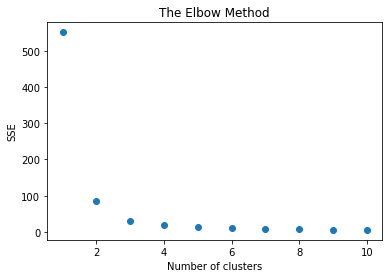

In [8]:
plt.scatter(range(1,11), sse)
plt.xlabel('Number of clusters')
plt.title('The Elbow Method')
plt.ylabel('SSE')

#### Training the Model

In [12]:
km= KMeans(n_clusters= 2)
km

KMeans(n_clusters=2)

In [13]:
prediction= km.fit_predict(df)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
df['cluster']= prediction
df.head()

,petal_length,petal_width,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [15]:
df1= df[df.cluster == 0]
df2= df[df.cluster == 1]

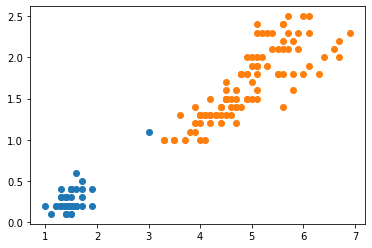

In [16]:
plt.scatter(df1.petal_length, df1.petal_width)
plt.scatter(df2.petal_length, df2.petal_width)

#### One data point is wrongly clustered

#### Scaled the limits.

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [18]:
scaler.fit(df[['petal_length']])
df.petal_length= scaler.transform(df[['petal_length']])
df

,petal_length,petal_width,cluster
0,0.067797,0.2,0
1,0.067797,0.2,0
2,0.050847,0.2,0
3,0.084746,0.2,0
4,0.067797,0.2,0
...,...,...,...
145,0.711864,2.3,1
146,0.677966,1.9,1
147,0.711864,2.0,1
148,0.745763,2.3,1


In [19]:
scaler.fit(df[['petal_width']])
df.petal_length= scaler.transform(df[['petal_width']])
df

,petal_length,petal_width,cluster
0,0.041667,0.2,0
1,0.041667,0.2,0
2,0.041667,0.2,0
3,0.041667,0.2,0
4,0.041667,0.2,0
...,...,...,...
145,0.916667,2.3,1
146,0.750000,1.9,1
147,0.791667,2.0,1
148,0.916667,2.3,1


In [20]:
df1= df[df.cluster == 0]
df2= df[df.cluster == 1]

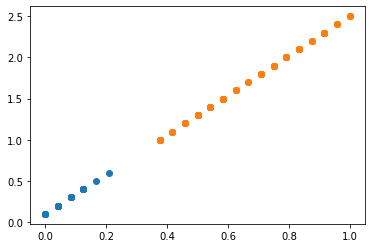

In [21]:
plt.scatter(df1.petal_length, df1.petal_width)
plt.scatter(df2.petal_length, df2.petal_width)